## Hyperparam search

In [1]:
from main import Agent
from main import Environment

from bokeh.io import output_notebook
import bokeh.plotting as plt
import numpy as np
from tqdm.auto import tqdm

import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Integer

np.int = np.int64  # https://github.com/scikit-optimize/scikit-optimize/issues/1171

import logging
from pprint import pprint


output_notebook()

Loading BokehJS ...

In [2]:
SAMPLES = 2
SEARCH_CALLS = 50

BAR = tqdm(desc='Hyper-param search', total=SEARCH_CALLS * SAMPLES)
OBJ_LOG = []

space = [
    #Integer(, 200, name='max_agents'),
    Integer(3, 10, name='num_issues'),
    Integer(30, 100, name='gov_term'),
    Real(0.01, 5, name='issue_solving_disagreement'),

    Real(0.1, 0.5, name='agent_convo_disagreement'),
    Real(0.01, 0.5, name='agent_confidence_gain'),
    Real(0.01, 0.5, name='agent_evolve_rate'),
    Integer(4, 10, name='agent_poly_degree'),
]

def objective(summary):
    """
    Accepts output from metrics.Stats.summary_metrics()
    """
    BAR.update()
    
    if summary['issues_solved_rate'] != 0:
        steady_solve_auc = summary['elapsed_time'] * summary['issues_solved'] / 2
        auc_improvement = 2 * summary['issues_solved_auc'] / steady_solve_auc  # improvement/t
        reasonable_solved = (1000 - summary['issues_solved']) / 1000  # solved num
        poly_stability = np.sqrt(summary['poly_complexity_var']) / 10  # pop stability
        confidence_var = summary['confidence_var']
        
        fitness =  auc_improvement + reasonable_solved + poly_stability + confidence_var
        
        OBJ_LOG.append({
            'auc_improvement': round(auc_improvement, 3),
            'reasonable_solved': round(reasonable_solved, 3),
            'poly_stability': round(poly_stability, 3),
            'confidence_var': round(confidence_var, 3),
        })
        
        return fitness
    else:
        return 0


@skopt.utils.use_named_args(space)
def run(**kwargs):
    measures = []

    kwargs['max_agents'] = 200

    for seed in range(SAMPLES):
        env = Environment(seed=seed, **kwargs)

        ticks = 1_000
        env.run(ticks=ticks)
        summary = env.stats.summary_metrics()
        measures.append(objective(summary))
    spread = round(np.std(measures) / np.mean(measures), 3)
    if spread > 0.1:
        #loggig.warning('Big spread : {} {}', np.std(measures)/np.mean(measures), measures)
        pass
    return np.mean(measures)

optimize_result = skopt.gp_minimize(
    func=run,
    dimensions=space,
    n_calls=SEARCH_CALLS,
    random_state=0,
)

for k in OBJ_LOG[0].keys():
    p = plt.figure(title=k)
    p.quad(np.histogram([o[k] for o in OBJ_LOG]))
    plt.show(p)
    print(k, [o[k] for o in OBJ_LOG])

winning_kwargs = dict(zip([a.name for a in space], optimize_result.x))
pprint(winning_kwargs)

Hyper-param search:   0%|          | 0/100 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/x/.cache/pypoetry/virtualenvs/multi-agent-system-LaaiSmjF-py3.11/lib/python3.11/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


Running 200 agents, gov size 10, 28 itx/t, 1000 ticks:   0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipykernel_15619/3350045052.py:59: RuntimeWarning: invalid value encountered in scalar divide
  spread = round(np.std(measures) / np.mean(measures), 3)


auc_improvement [1.992, 1.992, 1.984, 1.983, 1.988, 1.988, 1.996, 1.996, 1.761, 1.781, 1.876, 2.051, 1.986, 1.986, 1.988, 1.988, 1.992, 1.992, 1.994, 1.994, 1.984, 1.984, 1.998, 1.998, 1.998, 1.998, 0.884, 0.694, 0.82, 1.077, 1.998, 1.998, 2.674, 2.589, 0.404, 0.412, 1.007, 1.068, 1.988, 1.988]


reasonable_solved [0.005, 0.005, 0.009, 0.009, 0.007, 0.007, 0.003, 0.003, 0.122, 0.113, 0.072, 0.071, 0.008, 0.008, 0.007, 0.007, 0.005, 0.005, 0.004, 0.004, 0.009, 0.009, 0.002, 0.002, 0.002, 0.002, 0.601, 0.783, 0.592, 0.566, 0.002, 0.002, 0.975, 0.969, 0.797, 0.988, 0.5, 0.481, 0.007, 0.007]


poly_stability [0.05, 0.036, 0.033, 0.052, 0.162, 0.836, 0.037, 0.099, 0.045, 0.049, 0.108, 0.035, 0.039, 0.077, 0.042, 0.216, 0.057, 0.077, 0.04, 0.046, 0.045, 0.053, 0.193, 0.108, 2.244, 0.27, 0.044, 0.052, 0.043, 0.052, 0.11, 0.107, 0.104, 0.318, 0.037, 0.043, 0.044, 0.053, 0.043, 0.051]


confidence_var [3.709, 3.36, 2.563, 6.325, 0.608, 0.713, 0.71, 0.768, 56.814, 57.242, 0.807, 0.729, 0.565, 0.716, 0.455, 0.572, 0.695, 0.667, 0.737, 0.746, 0.247, 0.251, 0.743, 0.669, 0.213, 0.196, 0.377, 0.273, 0.472, 0.484, 0.507, 0.373, 0.725, 0.794, 531.519, 414.018, 626.418, 630.972, 44.22, 44.8]
{'agent_confidence_gain': 0.5,
 'agent_convo_disagreement': 0.5,
 'agent_evolve_rate': 0.5,
 'agent_poly_degree': 10,
 'gov_term': 30,
 'issue_solving_disagreement': 0.01,
 'num_issues': 10}


## Param codependence

array([[<Axes: xlabel='num_issues', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='gov_term'>,
        <Axes: xlabel='gov_term', ylabel='Partial dependence'>, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='issue_solving_disagreement'>, <Axes: >,
        <Axes: xlabel='issue_solving_disagreement', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='agent_convo_disagreement'>, <Axes: >, <Axes: >,
        <Axes: xlabel='agent_convo_disagreement', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='agent_confidence_gain'>, <Axes: >, <Axes: >,
        <Axes: >,
        <Axes: xlabel='agent_confidence_gain', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='agent_evolve_rate'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >,
        <Axes: xlabel='agent_evolve_rat

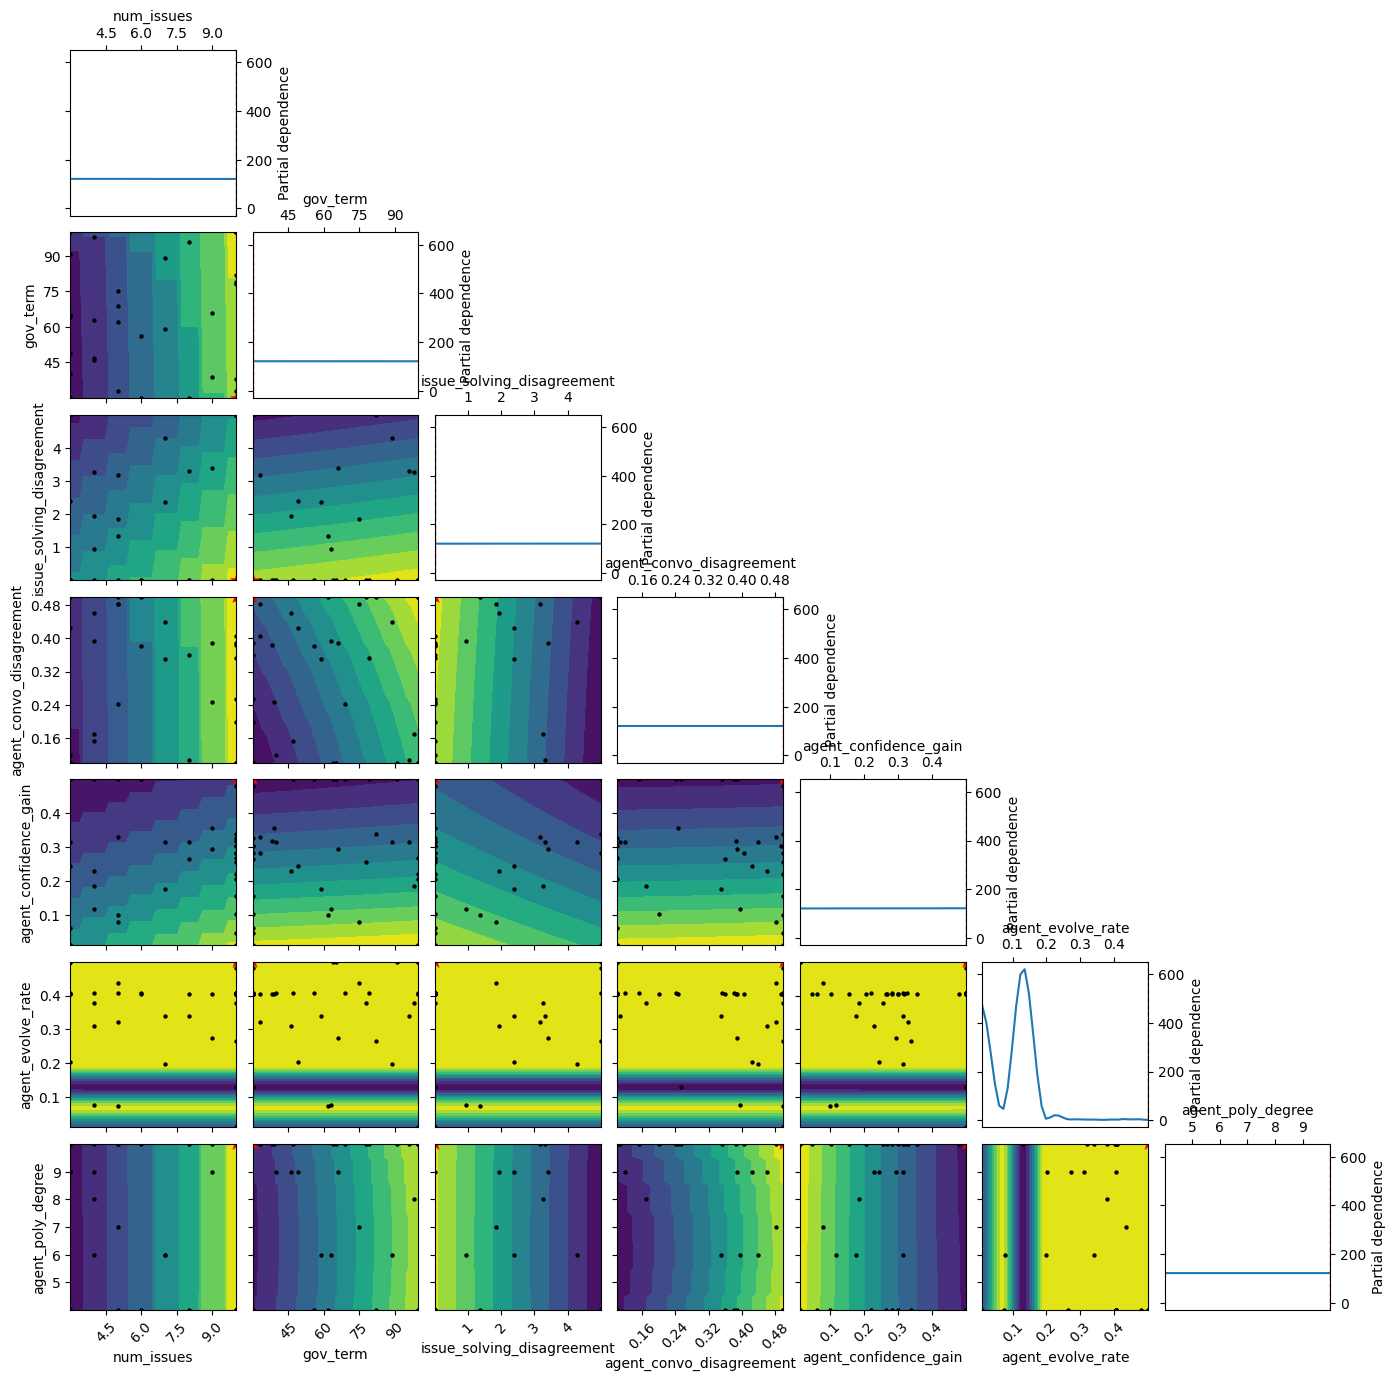

In [3]:
from skopt.plots import plot_objective
plot_objective(optimize_result)